### 读取数据

In [1]:
import pandas as pd

train_tsv = pd.read_csv('../data/train.tsv' , sep='\t')
test_tsv = pd.read_csv('../data/test.tsv' , sep='\t')

In [2]:
train_tsv

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [3]:
train_tsv.iloc[0,2]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [4]:
test_tsv

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [6]:
pd.read_csv('../data/sampleSubmission.csv' , sep=',')

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


### 数据清洗

In [5]:
import re

def count_words(sentence):
    words = re.findall(r'\b\w+\b', sentence)
    return len(words)

train_tsv['Word Count'] = train_tsv['Phrase'].apply(count_words)
train_tsv

,PhraseId,SentenceId,Phrase,Sentiment,Word Count
0,1,1,A series of escapades demonstrating the adage ...,1,35
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1
...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,2
156056,156057,8544,forced avuncular chortles,1,3
156057,156058,8544,avuncular chortles,3,2
156058,156059,8544,avuncular,2,1


In [6]:
train_tsv['Word Count'].describe()

count    156060.00000
mean          6.89463
std           6.57485
min           0.00000
25%           2.00000
50%           4.00000
75%           9.00000
max          48.00000
Name: Word Count, dtype: float64

看上去是有没有单词的句子

In [7]:
train_tsv[train_tsv['Word Count'] == 0]

,PhraseId,SentenceId,Phrase,Sentiment,Word Count
37,38,1,",",2,0
62,63,1,.,2,0
500,501,18,--,2,0
655,656,24,``,2,0
660,661,24,'',2,0
785,786,28,',2,0
865,866,32,...,2,0
1045,1046,38,`,2,0
1061,1062,39,-,2,0
1537,1538,57,!,2,0


### 观察一下测试集

In [8]:
test_tsv['Word Count'] = test_tsv['Phrase'].apply(count_words)
test_tsv

,PhraseId,SentenceId,Phrase,Word Count
0,156061,8545,An intermittently pleasing but mostly routine ...,7
1,156062,8545,An intermittently pleasing but mostly routine ...,7
2,156063,8545,An,1
3,156064,8545,intermittently pleasing but mostly routine effort,6
4,156065,8545,intermittently pleasing but mostly routine,5
...,...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario .",5
66288,222349,11855,"A long-winded , predictable scenario",5
66289,222350,11855,"A long-winded ,",3
66290,222351,11855,A long-winded,3


In [9]:
test_tsv[test_tsv['Word Count'] == 0]

,PhraseId,SentenceId,Phrase,Word Count
14,156075,8545,.,0
46,156107,8546,",",0
106,156167,8547,...,0
611,156672,8562,:,0
617,156678,8562,--,0
652,156713,8563,``,0
655,156716,8563,'',0
994,157055,8573,`,0
998,157059,8573,',0
1202,157263,8581,-,0


看来不能剔除那些全是字符的数据

### 下面统计一下看看

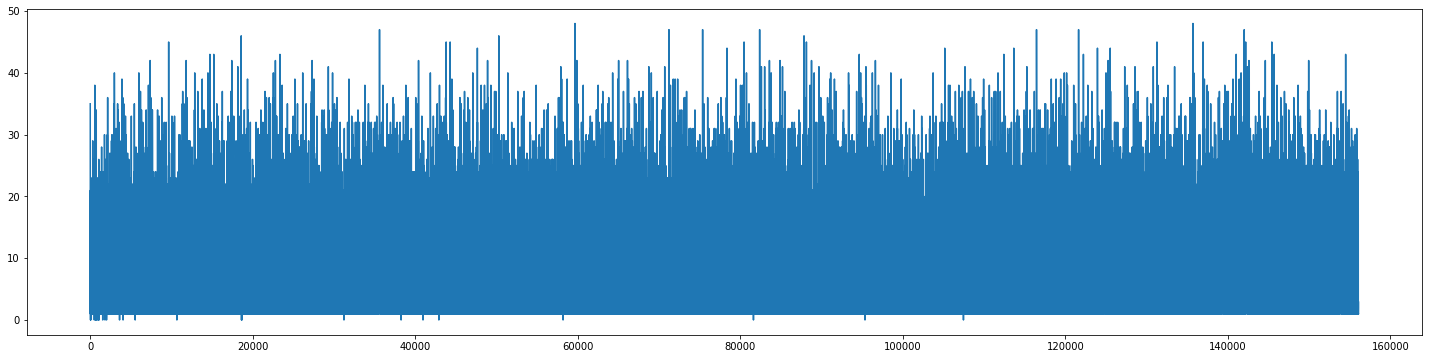

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 6))
plt.plot(train_tsv['Word Count'])
plt.show()

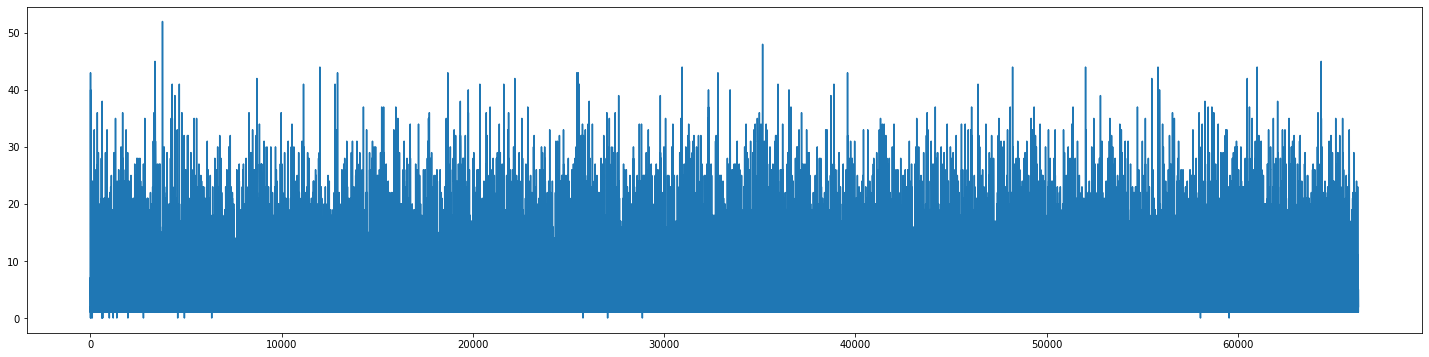

In [11]:
plt.figure(figsize=(25, 6))
plt.plot(test_tsv['Word Count'])
plt.show()

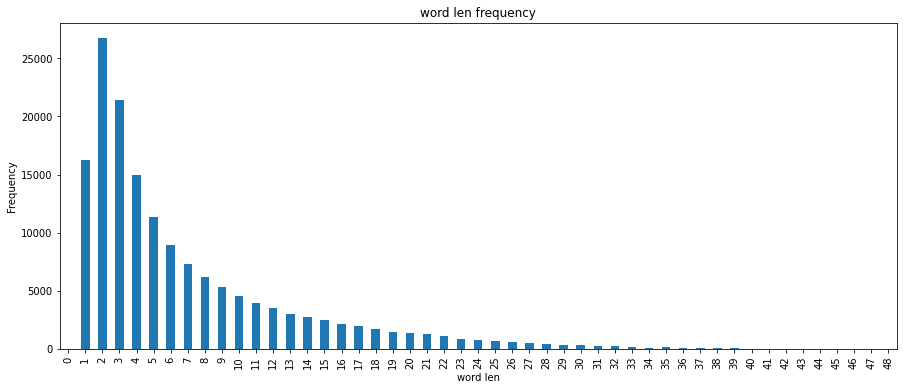

In [12]:
counts = train_tsv['Word Count'].value_counts()
counts = counts.sort_index()
# 使用 plot() 方法绘制图表
plt.figure(figsize=(15, 6))
counts.plot(kind='bar')

# 添加标题和标签
plt.title('word len frequency')
plt.xlabel('word len')
plt.ylabel('Frequency')

# 显示图表
plt.show()

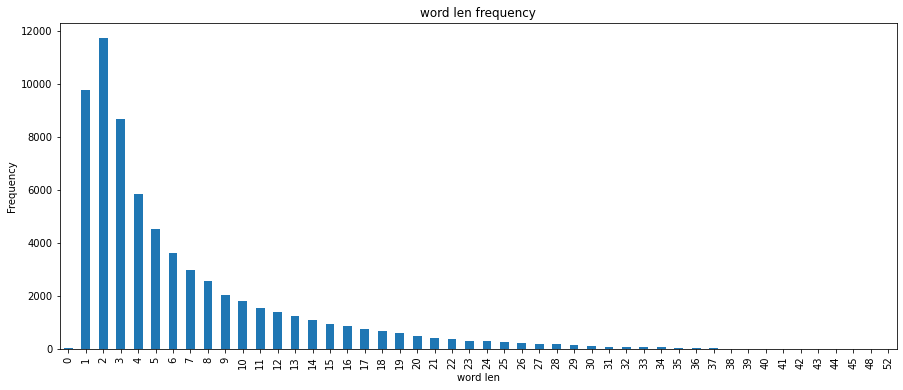

In [13]:
counts = test_tsv['Word Count'].value_counts()
counts = counts.sort_index()
# 使用 plot() 方法绘制图表
plt.figure(figsize=(15, 6))
counts.plot(kind='bar')

# 添加标题和标签
plt.title('word len frequency')
plt.xlabel('word len')
plt.ylabel('Frequency')

# 显示图表
plt.show()

#### 看一下train.tsv中各分类个数

In [21]:
category_counts = train_tsv['Sentiment'].value_counts()
category_counts.sort_index()

0     7072
1    27273
2    79582
3    32927
4     9206
Name: Sentiment, dtype: int64

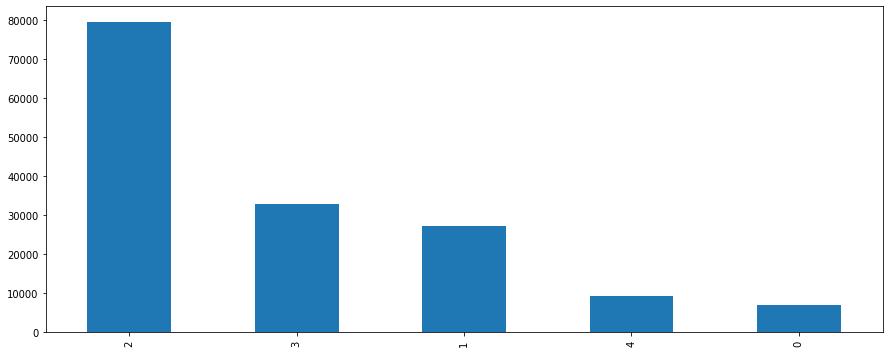

In [22]:
plt.figure(figsize=(15,6))
category_counts.plot(kind='bar')
plt.show()

考虑每次从2中抽取30000条数据用于训练，尽可能平衡数据。